<a href="https://colab.research.google.com/github/raudh1/LorenzModel/blob/main/generate_trajectories/GenTrajMLPLorenz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from random import randint
import os
import sys
import string
#from torch import Dataset, Dataloader
from numpy import linalg as LA
from torchsummary import summary
from numpy.core.defchararray import asarray
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.offsetbox import AnchoredText
from sklearn.model_selection import train_test_split

In [2]:
from generate import *


device= cpu


In [3]:
from matplotlib import pyplot as plt

In [4]:
import torch.nn.functional as F


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Set files and directories

In [6]:
#DEFINE MLP
class Model(nn.Module):
  
    def __init__(self):
        super().__init__()
        self.lin1 = nn.Linear(3, 60, bias=True)
        self.lin2 = nn.Linear(60, 42, bias=True)
        self.lin3 = nn.Linear(42, 3, bias=True)

    def forward(self, xb):
        x = xb.contiguous().view(-1, 3)
        x = self.lin1(x)
        x = F.relu(x)
        x = self.lin2(x)
        x = F.relu(x)

        return self.lin3(x).view(-1,1,3)              # if you use 9 traj instead of 1 use 9 

    def predict(self,input,N):
      
      output=torch.zeros(N+input.shape[0],1,3)
      traj_pred= self.forward(input)

      
      output[:len(traj_pred)]=traj_pred
      inp=traj_pred[-1]

      for i in range(len(traj_pred),N+len(traj_pred)):
        inp=self.forward(inp)
        output[i]=inp

      return output


In [7]:
if __name__ == '__main__':

    # load data and make training set
    hidden   = 32
    layer    = 2
    features = 3
    dropout  = 0
    # build the model        
    ini = 25
case = 'FULL'


**TRAIN**

In [8]:
train_data, valid_data, test_data=load_data(case,2)
print(train_data.shape)


seq = Model().double().to(device)

torch.Size([10125, 1, 3])


In [9]:
t_loss,v_loss=train_MLP(seq,train_data, valid_data,lr=0.001,epoch=1000) # true 10,000 epochs

input shape= torch.Size([10125, 1, 3])  target shape = torch.Size([1687, 1, 3])
0 train loss 270.48311852989724 valid loss 260.8262332616879
50 train loss 12.11111384729972 valid loss 11.789863934192313
100 train loss 1.993094935577982 valid loss 2.104011283269608
150 train loss 0.8029933861951557 valid loss 0.8130848437046495
200 train loss 0.46680367224881886 valid loss 0.4599964122483745
250 train loss 0.35849079284072577 valid loss 0.35462246837467687
300 train loss 0.3068461400233361 valid loss 0.30211246132418496
350 train loss 0.2659698143890289 valid loss 0.25921677055330755
400 train loss 0.22981282555831725 valid loss 0.22148684619128406
450 train loss 0.19793324439369533 valid loss 0.1883502155292703
500 train loss 0.1643830737472218 valid loss 0.15194728390539067
550 train loss 0.1323142064859613 valid loss 0.12214077539926972
600 train loss 0.10991912459934818 valid loss 0.10155694407759423
650 train loss 0.0914581347568245 valid loss 0.08343167956093239
700 train loss 0.0

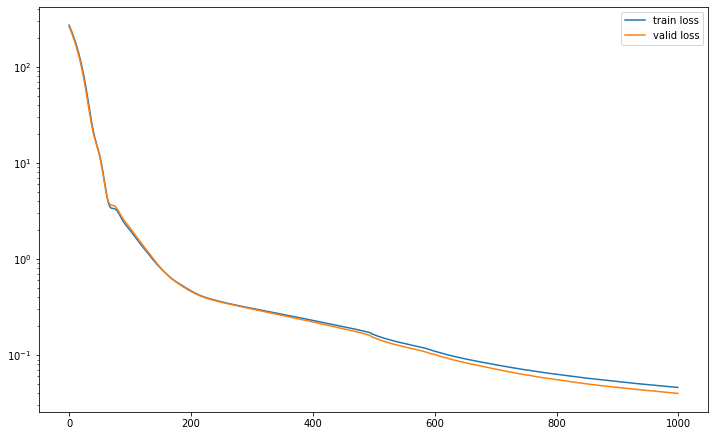

In [10]:
plt.figure(figsize=(12,7.45))
plt.plot(t_loss[:],label='train loss')
plt.plot(v_loss[:],label='valid loss')
#plt.xlim(len(t_loss)-100,len(t_loss))
plt.semilogy()
plt.legend()
plt.show()



In [11]:
mdl = Model()
mdl.load_state_dict(torch.load('./param'))

<All keys matched successfully>

In [12]:
input = test_data
input.shape

torch.Size([1687, 1, 3])

In [13]:
history=100
future=500
traj_1step, traj=generate_MLPtraj(seq,input,history,future)


**PLOT**

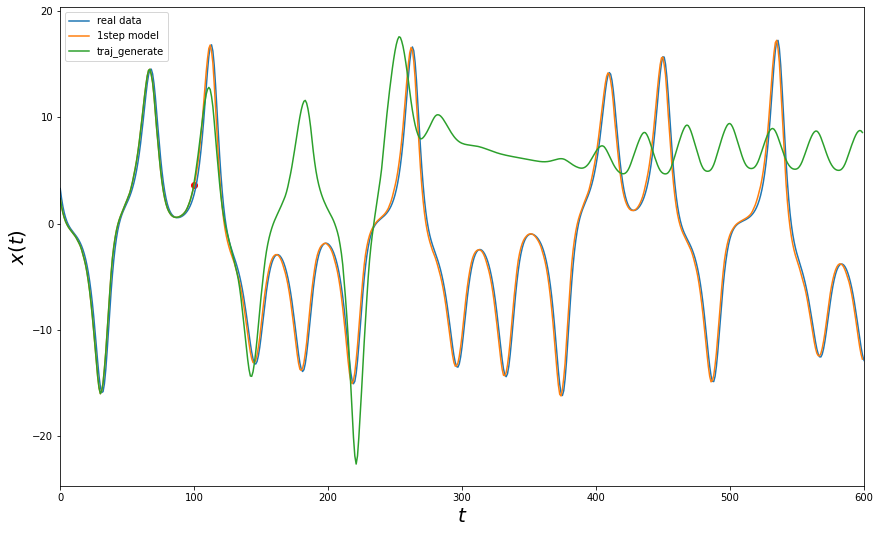

In [14]:
plot_traj(traj_1step=traj_1step,traj=traj,inp=input,
          h=history,coordinate='x',data=True,error=False)

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/proj3d.py:189: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.array([xs, ys, zs, np.ones_like(xs)])
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/proj3d.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([xs, ys, zs, np.ones_like(xs)])


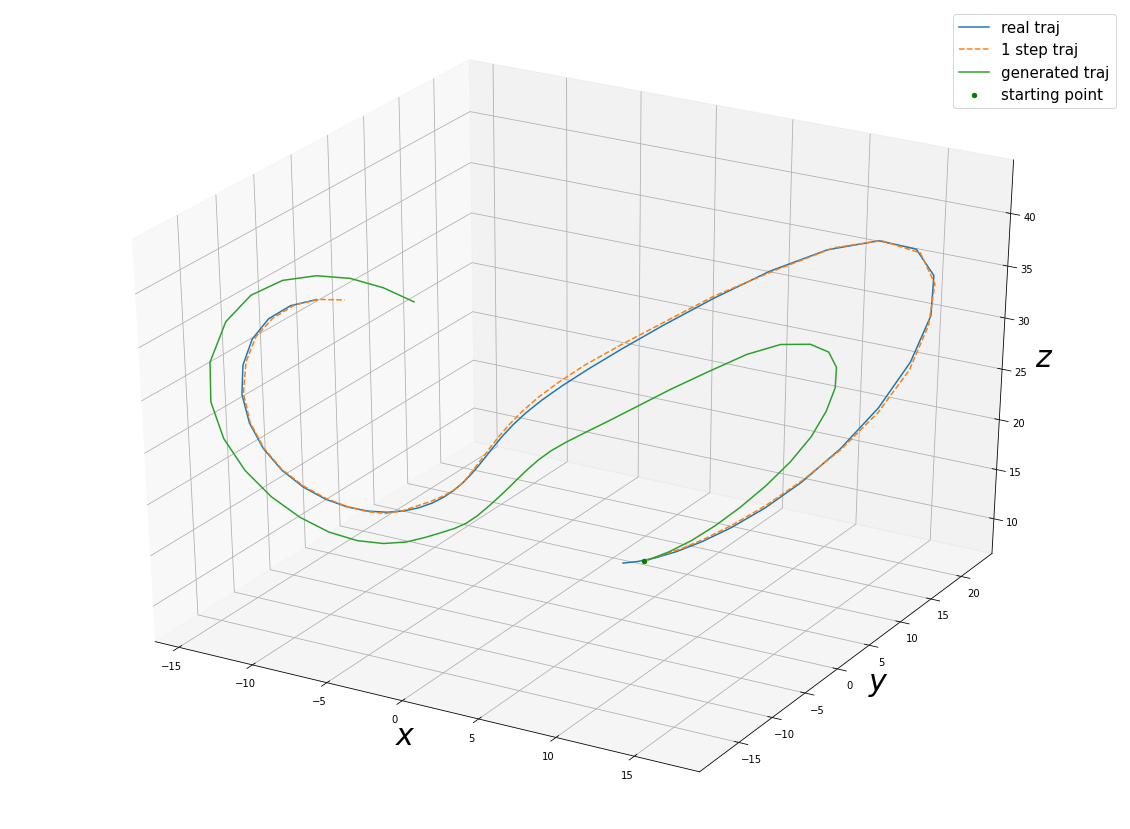

In [26]:
plot_traj_3D(traj,traj_1step,inp=input,h=history,f=50,data=True)

In [27]:
traj_1step_best, traj_best =generate_MLPtraj(mdl,input,history,future)


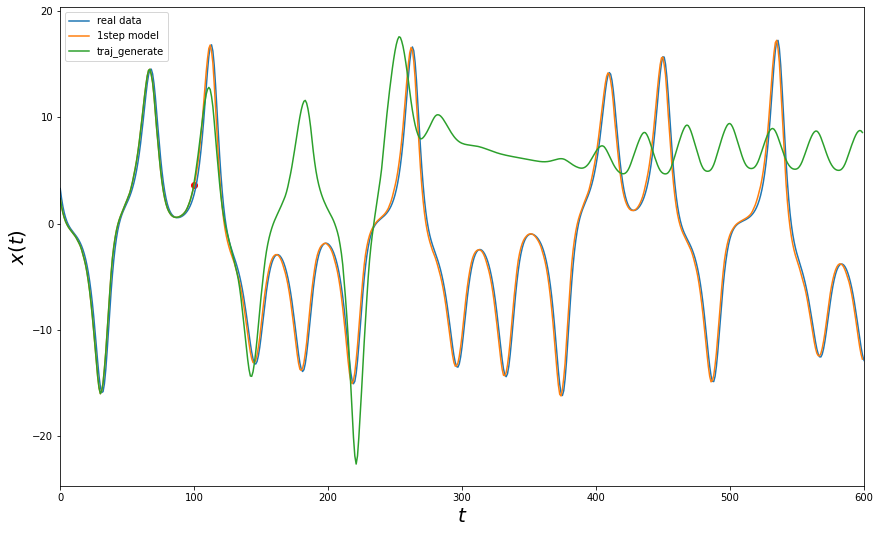

In [28]:
plot_traj(traj_1step=traj_1step_best,traj=traj_best,inp=input,
          h=history,coordinate='x',data=True,error=False)

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/proj3d.py:189: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.array([xs, ys, zs, np.ones_like(xs)])
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/proj3d.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([xs, ys, zs, np.ones_like(xs)])


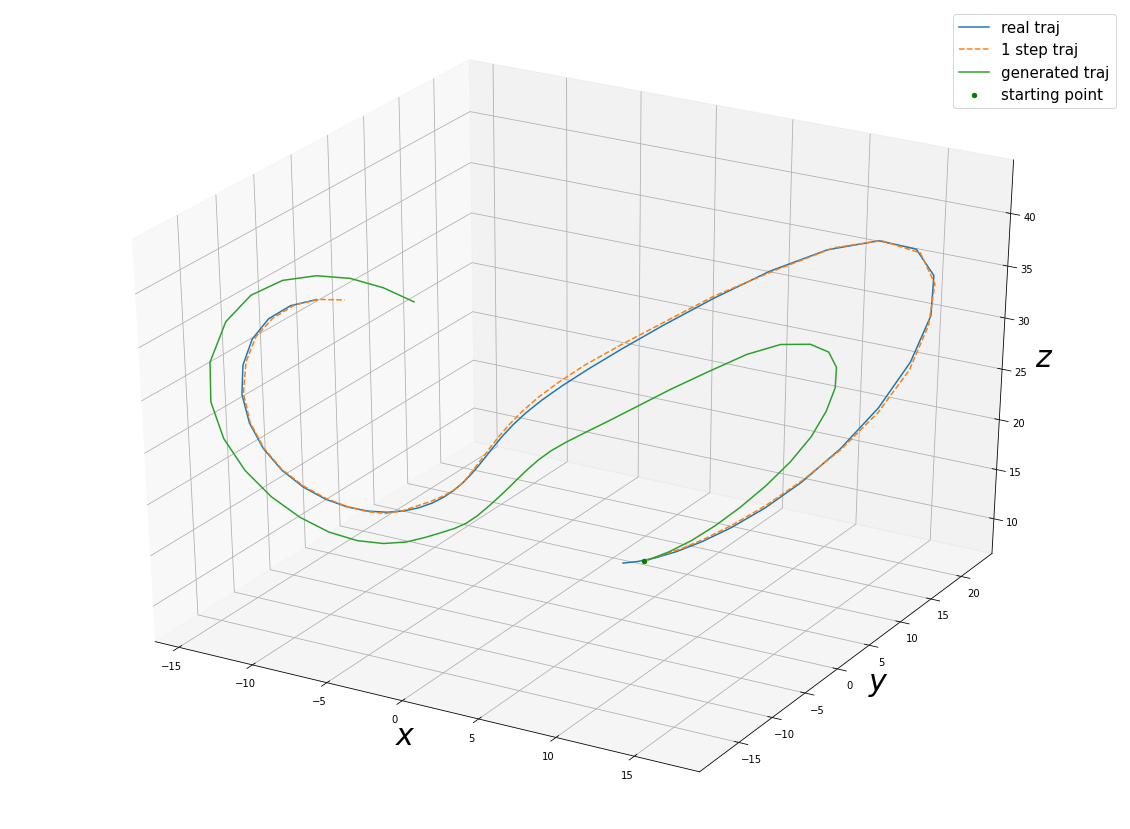

In [29]:
plot_traj_3D(traj_best,traj_1step_best,inp=input,h=history,f=50,data=True)